In [5]:
import tensorflow as tf
import cv2
import imutils
import matplotlib.pyplot as plt
import os

In [2]:
# Read the image
image = cv2.imread('D:\Concordia\COMP473\COMP_473_Project\CK+\\anger\S010_004_00000019.png')
# # Convert BGR image to RGB image
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to Tensor
img_to_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
# print the converted Torch tensor
print(img_to_tensor)

print("dtype of tensor:",img_to_tensor.dtype)

tf.Tensor(
[[[  0.   0.   0.]
  [ 25.  25.  25.]
  [ 84.  84.  84.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [ 56.  56.  56.]
  [144. 144. 144.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  1.   1.   1.]
  [  2.   2.   2.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 ...

 [[171. 171. 171.]
  [174. 174. 174.]
  [177. 177. 177.]
  ...
  [154. 154. 154.]
  [152. 152. 152.]
  [152. 152. 152.]]

 [[169. 169. 169.]
  [171. 171. 171.]
  [174. 174. 174.]
  ...
  [154. 154. 154.]
  [153. 153. 153.]
  [153. 153. 153.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  1.   1.   1.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]], shape=(490, 640, 3), dtype=float32)
dtype of tensor: <dtype: 'float32'>


In [4]:
rot_angle = [-10, -5, 0, 5, 10]
result = []

for a in rot_angle:
    imgr = imutils.rotate(image, angle=a)
    result+=[imgr]
    plt.show()

for i in result:
    to_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
    print("Rotated Image----------")
    print(to_tensor)

Rotated Image----------
tf.Tensor(
[[[  0.   0.   0.]
  [ 25.  25.  25.]
  [ 84.  84.  84.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [ 56.  56.  56.]
  [144. 144. 144.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [  1.   1.   1.]
  [  2.   2.   2.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 ...

 [[171. 171. 171.]
  [174. 174. 174.]
  [177. 177. 177.]
  ...
  [154. 154. 154.]
  [152. 152. 152.]
  [152. 152. 152.]]

 [[169. 169. 169.]
  [171. 171. 171.]
  [174. 174. 174.]
  ...
  [154. 154. 154.]
  [153. 153. 153.]
  [153. 153. 153.]]

 [[  0.   0.   0.]
  [  0.   0.   0.]
  [  1.   1.   1.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]], shape=(490, 640, 3), dtype=float32)
Rotated Image----------
tf.Tensor(
[[[  0.   0.   0.]
  [ 25.  25.  25.]
  [ 84.  84.  84.]
  ...
  [  0.   0.   0.]
  [  0.   0.   0.]
  [  0.   0.   0.]]

 [[  0.   0.   0.]
  [ 56.  56.  

In [70]:
# # get training and validation data on dataset 1
# train_ds1 = tf.keras.preprocessing.image_dataset_from_directory(
#     'D:\Concordia\COMP473\COMP_473_Project\CK+\\anger', 
#     # our original dataset is 48 pixels by 48 pixels
#     image_size = (48,48),
#     batch_size = 20 
# )
class_names = ['anger', 'disgust', 'fear', 'happy','sadness','surprise']

def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = cv2.imread(str(file_path))
  # img = tf.image.convert_image_dtype(file_path, dtype=tf.int16)
  # img = imutils.rotate(img, -10)
  # print(img)
  # plt.imshow(img.astype('uint8'))
  # plt.show()
  img_tf = tf.convert_to_tensor(img, dtype=tf.float32)
  return img_tf, label



[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


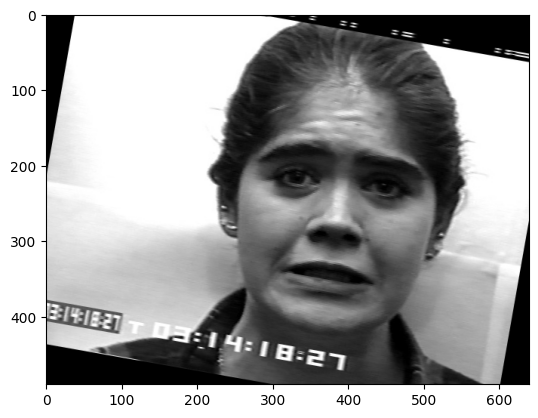

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(490, 640, 3), dtype=float32)
Label:  2


In [49]:
img, label = process_path('D:\Concordia\COMP473\COMP_473_Project\Augmented\TrainingSet1\\fear\S011_003_00000014.png')

print(img)
print("Label: ", label.numpy())


In [55]:
import pathlib
data_dir = pathlib.Path('D:\Concordia\COMP473\COMP_473_Project\CK+')
image_count = len(list(data_dir.glob('*/*.png')))
print("total image:", image_count)

list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

for f in list_ds.take(10):
  print(f.numpy())


test_size = int(image_count * 0.3)
train = list_ds.skip(test_size)
test_ds = list_ds.take(test_size)

val_size = int(len(train)*0.2)
print("Test set size:",test_size)
print("Train set size with validation:",len(train))
print("Val set size:",val_size)
train_ds = train.skip(val_size)
val_ds = train.take(val_size)

print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

print("For another dataset")
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

for f in list_ds.take(10):
  print(f.numpy())


test_size = int(image_count * 0.3)
train = list_ds.skip(test_size)
test_ds = list_ds.take(test_size)

val_size = int(len(train)*0.2)
print("Test set size:",test_size)
print("Train set size with validation:",len(train))
print("Val set size:",val_size)
train_ds = train.skip(val_size)
val_ds = train.take(val_size)

print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

for f in train_ds.take(10):
  print(f.numpy())

total image: 309
b'D:\\Concordia\\COMP473\\COMP_473_Project\\CK+\\surprise\\S107_001_00000010.png'
b'D:\\Concordia\\COMP473\\COMP_473_Project\\CK+\\anger\\S034_003_00000027.png'
b'D:\\Concordia\\COMP473\\COMP_473_Project\\CK+\\anger\\S109_003_00000017.png'
b'D:\\Concordia\\COMP473\\COMP_473_Project\\CK+\\surprise\\S132_008_00000010.png'
b'D:\\Concordia\\COMP473\\COMP_473_Project\\CK+\\happiness\\S094_004_00000012.png'
b'D:\\Concordia\\COMP473\\COMP_473_Project\\CK+\\happiness\\S138_005_00000016.png'
b'D:\\Concordia\\COMP473\\COMP_473_Project\\CK+\\disgust\\S087_004_00000012.png'
b'D:\\Concordia\\COMP473\\COMP_473_Project\\CK+\\fear\\S054_002_00000015.png'
b'D:\\Concordia\\COMP473\\COMP_473_Project\\CK+\\anger\\S503_001_00000071.png'
b'D:\\Concordia\\COMP473\\COMP_473_Project\\CK+\\surprise\\S075_002_00000014.png'
Test set size: 92
Train set size with validation: 217
Val set size: 43
174
43
For another dataset
b'D:\\Concordia\\COMP473\\COMP_473_Project\\CK+\\anger\\S072_005_00000019.png

In [71]:
# train_ds = train_ds.map(process_path, num_parallel_calls='AUTOTUNE')
# val_ds = val_ds.map(process_path, num_parallel_calls='AUTOTUNE')

# for image, label in train_ds.take(1):
#   print("Image shape: ", image.numpy().shape)
#   print("Label: ", label.numpy())

for i in train_ds.take(1):
  process_path(i)

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.